# Instructions:

Please answer the following questions as thoroughly as possible to produce correct output and to clearly interpret the results if the question asks for it.

## Question 1 (50 points)

### Import neccessary libraries:

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb  
from IPython.display import Image,display 
from sklearn.tree import export_graphviz
from sklearn import tree
import subprocess
import os
import scipy.stats as st

In [74]:
!pip install xlrd

### Load the dataset as excel 'titanic.xls'

In [94]:
df = pd.read_excel("titanic.xls")
len(df)

1309

### Show the head of the dataframe and briefly explain the data

In [76]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# This was data collected about those who boarded the Titanic, as well as whether they survived or not. 

### Return some info on the data and briefly explain what the categories mean

In [33]:
df.dtypes
df.count

<bound method DataFrame.count of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin emb

In [ ]:
# There is information on 1309 people in this datasheet. 'sex' refers to whether the passenger was male or female, 'age' refers to the passenger's age at the time, 'sibsp' is how many siblings & spouses of the passenger aboard the Titanic, 'parch' is the number of parents or children aboard the ship, 'ticket' is their ticket number, 'fare' is the passenger fare, 'cabin' is their cabin number, 'embarked' refers to C = Cherbourg, Q = Queenstown,S = Southampton, 'boat' is the lifeboat number, 'body' is the number of the body recovered, and 'home destination' is their expected landing.

### 'Describe' the main statistical features of the data

In [34]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Include 50% to 100% percentile with 5% increments for the 'age' column in the describe method output

In [77]:
percentile = [i/100 for i in range(50,101,5)]
df['age'].describe(percentiles=percentile)

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
50%        28.000000
55%        30.000000
60%        31.000000
65%        33.000000
70%        36.000000
75%        39.000000
80%        42.000000
85%        45.000000
90%        50.000000
95%        57.000000
100%       80.000000
max        80.000000
Name: age, dtype: float64

### What is the 80% percentile of the 'age' column?

In [78]:
the_80_percentile = df['age'].quantile(0.8)

In [79]:
print(the_80_percentile)

42.0


### Create a sub dataframe where the age of passengers is above the 80% percentile calculated above

In [80]:
age_pass_80 = df[df['age'] > the_80_percentile]
print(age_pass_80)

      pclass  survived                                           name     sex  \
5          1         1                            Anderson, Mr. Harry    male   
6          1         1              Andrews, Miss. Kornelia Theodosia  female   
8          1         1  Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9          1         0                        Artagaveytia, Mr. Ramon    male   
10         1         0                         Astor, Col. John Jacob    male   
...      ...       ...                                            ...     ...   
1261       3         1                         Turkula, Mrs. (Hedwig)  female   
1272       3         0                    Vander Cruyssen, Mr. Victor    male   
1287       3         0               Widegren, Mr. Carl/Charles Peter    male   
1290       3         1               Wilkes, Mrs. James (Ellen Needs)  female   
1301       3         0                           Youseff, Mr. Gerious    male   

       age  sibsp  parch   

### Count the number of passengers in first class

In [81]:
first_class_passengers = len(df[df['pclass'] == 1])
print(first_class_passengers)

323


### Create a new column called 'older than 90% percentile' where it's true/false if the passenger is older/younger than the 90% percentile

In [82]:
the_90_percentile = df['age'].quantile(0.9)
df["older_than_90"] = df['age'] > the_90_percentile
df.head

<bound method NDFrame.head of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embark

### Group the 'fare' column by the class of passenger and get the mean fare price for each class

In [83]:
mean_fare = df.groupby('pclass')['fare'].mean()
mean_fare.head

<bound method NDFrame.head of pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64>

### Plot the bar chart for the avg fare grouped by class

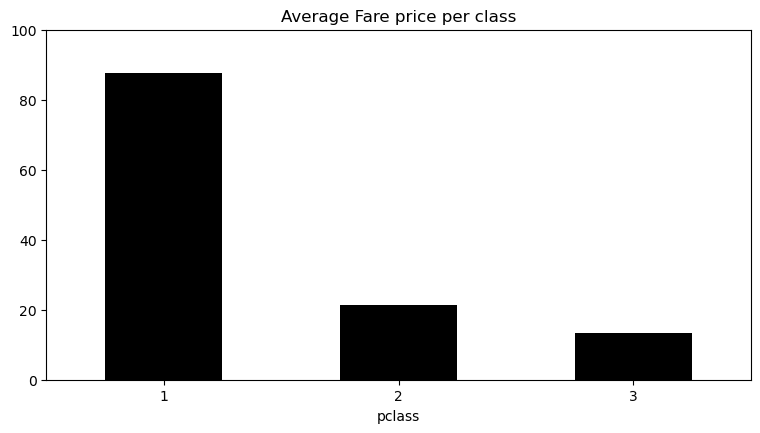

In [84]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(2,2,1)
opts=mean_fare.plot(kind='bar',ax=ax1,color='black',rot=True,
                               title="Average Fare price per class",
                               ylim=((0,100)))

### Getting the number of outliers: define the upper bound and lower bound for the 'fare' column at 95% or 5% and count how many passengers are considered outliers

In [85]:
smaller_than_5 = df['fare'].quantile(0.05)
df['lower_5'] = df['fare'] < smaller_than_5
bigger_than_95 = df['fare'].quantile(0.95)
df['high_95'] = df['fare'] > bigger_than_95

print(df['high_95'].sum())
print(df['lower_5'].sum())

65
54


### Replace outliers in the dataframe by the mean of the 'fare' column

In [95]:
mean = df['fare'].mean()
df['fare'] = np.where(df['fare'] > bigger_than_95, mean, df['fare'])
df['fare'] = np.where(df['fare'] < smaller_than_5, mean, df['fare'])



In [96]:
df['lower_5'] = df['fare'] < smaller_than_5
df['high_95'] = df['fare'] > bigger_than_95

print(df['high_95'].sum())
print(df['lower_5'].sum())

0
0


## Question 2 (50 points)

### Load the contents of 'titanic2.csv', look at the head of the data for its structure and combine it with the previous dataframe

In [98]:
df1 = pd.read_csv("titanic2.csv")
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
2,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
3,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
4,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [160]:
df2 = pd.concat([df,df1], axis = 0)
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,lower_5,high_95
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,33.295479,B5,S,2,NaN,"St Louis, MO",False,False
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,33.295479,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",False,False
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,33.295479,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",False,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,33.295479,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",False,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,33.295479,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",False,False


### Plot a scatter plot of 'age' vs 'fare' for your data and calculate the correlation between these two columns

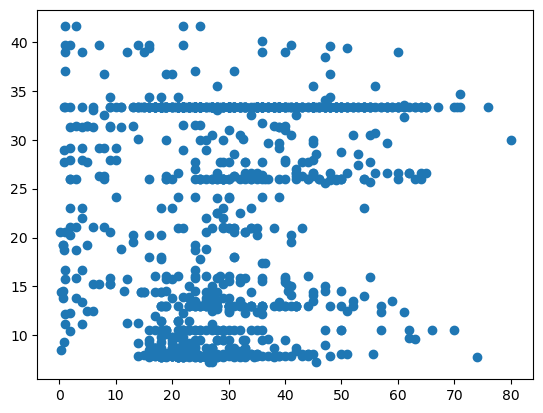

In [108]:
plt.scatter(df2['age'], df2['fare'])

In [109]:
print(df2['age'].corr(df2['fare']))

0.1598067809421288


### Drop 'name', 'cabin', 'boat', 'body','home.dest', 'embarked', 'ticket' columns

In [111]:
df2 = df2.drop(columns=['name', 'cabin', 'boat', 'body','home.dest', 'embarked', 'ticket'])

In [112]:
df2.head()

,pclass,survived,sex,age,sibsp,parch,fare,lower_5,high_95
0,1,1,female,29.0000,0,0,33.295479,False,False
1,1,1,male,0.9167,1,2,33.295479,False,False
2,1,0,female,2.0000,1,2,33.295479,False,False
3,1,0,male,30.0000,1,2,33.295479,False,False
4,1,0,female,25.0000,1,2,33.295479,False,False


# Filling missing data in 'age' column by using an educated guess:

### Write a function that takes two columns, 'age' and 'pclass', as input and depending on which pclass, if the age is NaN (command: pd.isnull(age)   ) it returns age 40, 30 or 25. For example, if input is [NaN, 1], it returns age = 40

In [131]:
def fill_age(row):
    age = row['age']
    pclass = row['pclass']
    if np.isnan(age):
        if pclass == 1:
            return 40
        elif pclass == 2:
            return 30
        elif pclass == 3:
            return 25
    return age

### Use apply to clean up age database for NaN using the function created above

In [132]:
df2.apply(fill_age,axis = 1)

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
      ...   
4    14.5000
5    25.0000
6    26.5000
7    27.0000
8    29.0000
Length: 1318, dtype: float64

### In the 'fare' column, isolate and display the row where there is NaN

In [135]:
df3 = df2[df2['fare'].isnull()]
df3.head()

,pclass,survived,sex,age,sibsp,parch,fare,lower_5,high_95
1225,3,0,male,60.5,0,0,NaN,False,False


### Using apply fuction, convert the data in 'sex' column to zeros and ones: if female, replace by 1, otherwise by 0

In [145]:
def sex_number(row):
    sex = row['sex']
    if sex == 'female':
        return 1
    else:
        return 0

In [146]:
df2['sex'] = df2.apply(sex_number,axis = 1)

### Display the top rows for 'sex' column

In [147]:
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,lower_5,high_95
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,33.295479,B5,S,2,NaN,"St Louis, MO",False,False
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,33.295479,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",False,False
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,33.295479,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",False,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,33.295479,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",False,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,33.295479,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",False,False


### Confirm that the contents of the 'sex' column are integers by showing the type of one content (zero's index, first, etc) or using the info command

In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1318 entries, 0 to 8
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1318 non-null   int64  
 1   survived   1318 non-null   int64  
 2   name       1318 non-null   object 
 3   sex        1318 non-null   int64  
 4   age        1052 non-null   float64
 5   sibsp      1318 non-null   int64  
 6   parch      1318 non-null   int64  
 7   ticket     1318 non-null   object 
 8   fare       1317 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1316 non-null   object 
 11  boat       486 non-null    object 
 12  body       124 non-null    float64
 13  home.dest  745 non-null    object 
 14  lower_5    1309 non-null   object 
 15  high_95    1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 175.0+ KB


### In 'fare' column, replace NaN with the mean of the column

In [152]:
def replace_fare(row):
    fare = row['fare']
    if np.isnan(fare):
        return np.mean(fare)

In [153]:
df2['fare'] = df2.apply(replace_fare,axis = 1)

### Drop any leftover NaN in the dataframe

In [159]:
df2 = df2.dropna()
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,lower_5,high_95


### Display the head of cleaned dataframe

In [28]:
#Answer here

# QED!